In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../..')
from src import load_image, ImageQuant2
%matplotlib widget

In [3]:
# Import cytoplasmic profile
cytbg = np.loadtxt('../../data/calibration_cyt.txt')

# Import embryos dataframe
df = pd.read_csv('../../data/par2_nebd_embryos.csv')

# Select 10 random wild type, C56S and L109R embryos
n = 10
df_wt = df[(df.Line == 'lp637') * (df.RNAi == 'wt')].sample(n)
df_c56s = df[(df.Line == 'nwg240') * (df.RNAi == 'wt')].sample(n)
df_l109r = df[(df.Line == 'nwg338') * (df.RNAi == 'wt')].sample(n)
df_l50r = df[(df.Line == 'nwg400') * (df.RNAi == 'wt')].sample(n)
df_het = df[(df.Line == 'nwg325bal') * (df.RNAi == 'wt')].sample(n)
df_sample = pd.concat([df_wt, df_c56s, df_l109r, df_l50r, df_het])

df_sample.to_csv('../../data/calibration_embryos.csv')
df = pd.read_csv('../../data/calibration_embryos.csv')

In [6]:
# Import data
paths_wt = df[df.Line == 'lp637'].Path.to_list()
paths_c56s = df[df.Line == 'nwg240'].Path.to_list()
paths_l109r = df[df.Line == 'nwg338'].Path.to_list()
paths_l50r = df[df.Line == 'nwg400'].Path.to_list()
paths_het = df[df.Line == 'nwg325bal'].Path.to_list()
print(len(paths_wt))

imgs_wt = [load_image(p + '/af_corrected.tif') for p in paths_wt]
imgs_c56s = [load_image(p + '/af_corrected.tif') for p in paths_c56s]
imgs_l109r = [load_image(p + '/af_corrected.tif') for p in paths_l109r]
imgs_l50r = [load_image(p + '/af_corrected.tif') for p in paths_l50r]
imgs_het = [load_image(p + '/af_corrected.tif') for p in paths_het]

rois_wt = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_wt]
rois_c56s = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_c56s]
rois_l109r = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_l109r]
rois_l50r = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_l50r]
rois_het = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_het]

In [7]:
# Global calibration parameters
kwargs_dict = {'lr': 0.005, 'descent_steps': 1000}

### Calibration 1 (WT)


  0%|                                                                                                                                      | 0/1000 [00:00<?, ?it/s]


  0%|▏                                                                                                                             | 1/1000 [00:00<11:26,  1.46it/s]


  2%|██▏                                                                                                                          | 17/1000 [00:00<00:34, 28.54it/s]


  3%|████▎                                                                                                                        | 34/1000 [00:00<00:17, 56.13it/s]


  5%|██████▍                                                                                                                      | 51/1000 [00:00<00:11, 80.66it/s]


  7%|████████▍                                                                                                                   | 68/1000 [00:01<00:09, 101.65it/s]


  8%|██████████▌                                                                                                                 | 85/1000 [00:01<00:07, 117.61it/s]


 10%|████████████▍                                                                                                              | 101/1000 [00:01<00:07, 125.97it/s]


 12%|██████████████▌                                                                                                            | 118/1000 [00:01<00:06, 136.38it/s]


 14%|████████████████▌                                                                                                          | 135/1000 [00:01<00:05, 144.40it/s]


 15%|██████████████████▋                                                                                                        | 152/1000 [00:01<00:05, 150.97it/s]


 17%|████████████████████▊                                                                                                      | 169/1000 [00:01<00:05, 152.67it/s]


 19%|██████████████████████▉                                                                                                    | 186/1000 [00:01<00:05, 156.40it/s]


 20%|████████████████████████▉                                                                                                  | 203/1000 [00:01<00:04, 159.69it/s]


 22%|███████████████████████████                                                                                                | 220/1000 [00:02<00:04, 161.85it/s]


 24%|█████████████████████████████▏                                                                                             | 237/1000 [00:02<00:04, 163.24it/s]


 25%|███████████████████████████████▏                                                                                           | 254/1000 [00:02<00:04, 163.91it/s]


 27%|█████████████████████████████████▎                                                                                         | 271/1000 [00:02<00:04, 165.01it/s]


 29%|███████████████████████████████████▍                                                                                       | 288/1000 [00:02<00:04, 166.05it/s]


 30%|█████████████████████████████████████▌                                                                                     | 305/1000 [00:02<00:04, 165.13it/s]


 32%|███████████████████████████████████████▌                                                                                   | 322/1000 [00:02<00:04, 165.77it/s]


 34%|█████████████████████████████████████████▋                                                                                 | 339/1000 [00:02<00:04, 164.36it/s]


 36%|███████████████████████████████████████████▊                                                                               | 356/1000 [00:02<00:03, 163.19it/s]


 37%|█████████████████████████████████████████████▉                                                                             | 373/1000 [00:02<00:03, 164.38it/s]


 39%|███████████████████████████████████████████████▉                                                                           | 390/1000 [00:03<00:03, 164.45it/s]


 41%|██████████████████████████████████████████████████                                                                         | 407/1000 [00:03<00:03, 164.68it/s]


 42%|████████████████████████████████████████████████████▏                                                                      | 424/1000 [00:03<00:03, 165.21it/s]


 44%|██████████████████████████████████████████████████████▏                                                                    | 441/1000 [00:03<00:03, 161.94it/s]


 46%|████████████████████████████████████████████████████████▎                                                                  | 458/1000 [00:03<00:03, 160.11it/s]


 48%|██████████████████████████████████████████████████████████▍                                                                | 475/1000 [00:03<00:03, 156.44it/s]


 49%|████████████████████████████████████████████████████████████▍                                                              | 491/1000 [00:03<00:03, 153.16it/s]


 51%|██████████████████████████████████████████████████████████████▍                                                            | 508/1000 [00:03<00:03, 155.47it/s]


 52%|████████████████████████████████████████████████████████████████▌                                                          | 525/1000 [00:03<00:02, 158.70it/s]


 54%|██████████████████████████████████████████████████████████████████▋                                                        | 542/1000 [00:04<00:02, 161.23it/s]


 56%|████████████████████████████████████████████████████████████████████▊                                                      | 559/1000 [00:04<00:02, 163.22it/s]


 58%|██████████████████████████████████████████████████████████████████████▊                                                    | 576/1000 [00:04<00:02, 163.99it/s]


 59%|████████████████████████████████████████████████████████████████████████▉                                                  | 593/1000 [00:04<00:02, 164.18it/s]


 61%|███████████████████████████████████████████████████████████████████████████                                                | 610/1000 [00:04<00:02, 165.07it/s]


 63%|█████████████████████████████████████████████████████████████████████████████                                              | 627/1000 [00:04<00:02, 164.92it/s]


 64%|███████████████████████████████████████████████████████████████████████████████▏                                           | 644/1000 [00:04<00:02, 165.69it/s]


 66%|█████████████████████████████████████████████████████████████████████████████████▎                                         | 661/1000 [00:04<00:02, 164.91it/s]


 68%|███████████████████████████████████████████████████████████████████████████████████▍                                       | 678/1000 [00:04<00:01, 163.74it/s]


 70%|█████████████████████████████████████████████████████████████████████████████████████▍                                     | 695/1000 [00:04<00:01, 160.32it/s]


 71%|███████████████████████████████████████████████████████████████████████████████████████▌                                   | 712/1000 [00:05<00:01, 162.54it/s]


 73%|█████████████████████████████████████████████████████████████████████████████████████████▋                                 | 729/1000 [00:05<00:01, 162.60it/s]


 75%|███████████████████████████████████████████████████████████████████████████████████████████▊                               | 746/1000 [00:05<00:01, 162.56it/s]


 76%|█████████████████████████████████████████████████████████████████████████████████████████████▊                             | 763/1000 [00:05<00:01, 161.28it/s]


 78%|███████████████████████████████████████████████████████████████████████████████████████████████▉                           | 780/1000 [00:05<00:01, 162.82it/s]


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████                         | 797/1000 [00:05<00:01, 163.61it/s]


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████                       | 814/1000 [00:05<00:01, 163.71it/s]


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 831/1000 [00:05<00:01, 163.85it/s]


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 848/1000 [00:05<00:00, 165.07it/s]


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 865/1000 [00:05<00:00, 161.61it/s]


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 882/1000 [00:06<00:00, 162.35it/s]


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 899/1000 [00:06<00:00, 163.69it/s]


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 916/1000 [00:06<00:00, 164.98it/s]


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 933/1000 [00:06<00:00, 163.88it/s]


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 950/1000 [00:06<00:00, 162.49it/s]


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 967/1000 [00:06<00:00, 161.99it/s]


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 984/1000 [00:06<00:00, 163.46it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 146.64it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

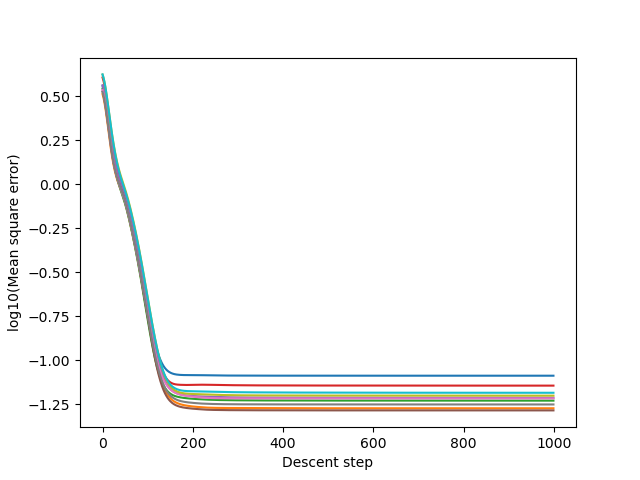

In [8]:
iq1 = ImageQuant2(img=imgs_wt, roi=rois_wt, cytbg=cytbg)
iq1.calibrate_membrane(**kwargs_dict)
iq1.plot_losses(log=True)

### Calibration 2 (C56S)


  0%|                                                                                                                                      | 0/1000 [00:00<?, ?it/s]


  0%|▏                                                                                                                             | 1/1000 [00:00<07:17,  2.28it/s]


  2%|██▎                                                                                                                          | 18/1000 [00:00<00:22, 43.18it/s]


  4%|████▍                                                                                                                        | 35/1000 [00:00<00:12, 75.08it/s]


  5%|██████▌                                                                                                                      | 52/1000 [00:00<00:09, 99.32it/s]


  7%|████████▌                                                                                                                   | 69/1000 [00:00<00:07, 117.69it/s]


  9%|██████████▋                                                                                                                 | 86/1000 [00:00<00:06, 131.93it/s]


 10%|████████████▋                                                                                                              | 103/1000 [00:01<00:06, 142.67it/s]


 12%|██████████████▊                                                                                                            | 120/1000 [00:01<00:05, 150.05it/s]


 14%|████████████████▊                                                                                                          | 137/1000 [00:01<00:05, 155.16it/s]


 15%|██████████████████▉                                                                                                        | 154/1000 [00:01<00:05, 157.21it/s]


 17%|█████████████████████                                                                                                      | 171/1000 [00:01<00:05, 160.03it/s]


 19%|███████████████████████                                                                                                    | 188/1000 [00:01<00:04, 162.48it/s]


 20%|█████████████████████████▏                                                                                                 | 205/1000 [00:01<00:04, 163.21it/s]


 22%|███████████████████████████▎                                                                                               | 222/1000 [00:01<00:04, 163.68it/s]


 24%|█████████████████████████████▍                                                                                             | 239/1000 [00:01<00:04, 165.27it/s]


 26%|███████████████████████████████▍                                                                                           | 256/1000 [00:01<00:04, 166.20it/s]


 27%|█████████████████████████████████▋                                                                                         | 274/1000 [00:02<00:04, 167.81it/s]


 29%|███████████████████████████████████▊                                                                                       | 291/1000 [00:02<00:04, 168.21it/s]


 31%|█████████████████████████████████████▉                                                                                     | 308/1000 [00:02<00:04, 168.30it/s]


 32%|███████████████████████████████████████▉                                                                                   | 325/1000 [00:02<00:04, 166.75it/s]


 34%|██████████████████████████████████████████                                                                                 | 342/1000 [00:02<00:03, 166.16it/s]


 36%|████████████████████████████████████████████▏                                                                              | 359/1000 [00:02<00:03, 166.81it/s]


 38%|██████████████████████████████████████████████▏                                                                            | 376/1000 [00:02<00:03, 167.08it/s]


 39%|████████████████████████████████████████████████▎                                                                          | 393/1000 [00:02<00:03, 167.04it/s]


 41%|██████████████████████████████████████████████████▍                                                                        | 410/1000 [00:02<00:03, 164.78it/s]


 43%|████████████████████████████████████████████████████▌                                                                      | 427/1000 [00:03<00:03, 163.34it/s]


 44%|██████████████████████████████████████████████████████▋                                                                    | 445/1000 [00:03<00:03, 165.91it/s]


 46%|████████████████████████████████████████████████████████▊                                                                  | 462/1000 [00:03<00:03, 166.71it/s]


 48%|██████████████████████████████████████████████████████████▉                                                                | 479/1000 [00:03<00:03, 166.72it/s]


 50%|█████████████████████████████████████████████████████████████                                                              | 496/1000 [00:03<00:03, 166.52it/s]


 51%|███████████████████████████████████████████████████████████████                                                            | 513/1000 [00:03<00:02, 167.30it/s]


 53%|█████████████████████████████████████████████████████████████████▏                                                         | 530/1000 [00:03<00:02, 167.84it/s]


 55%|███████████████████████████████████████████████████████████████████▎                                                       | 547/1000 [00:03<00:02, 167.85it/s]


 56%|█████████████████████████████████████████████████████████████████████▎                                                     | 564/1000 [00:03<00:02, 166.74it/s]


 58%|███████████████████████████████████████████████████████████████████████▍                                                   | 581/1000 [00:03<00:02, 166.55it/s]


 60%|█████████████████████████████████████████████████████████████████████████▌                                                 | 598/1000 [00:04<00:02, 166.06it/s]


 62%|███████████████████████████████████████████████████████████████████████████▋                                               | 615/1000 [00:04<00:02, 161.85it/s]


 63%|█████████████████████████████████████████████████████████████████████████████▋                                             | 632/1000 [00:04<00:02, 161.21it/s]


 65%|███████████████████████████████████████████████████████████████████████████████▊                                           | 649/1000 [00:04<00:02, 157.95it/s]


 66%|█████████████████████████████████████████████████████████████████████████████████▊                                         | 665/1000 [00:04<00:02, 157.08it/s]


 68%|███████████████████████████████████████████████████████████████████████████████████▉                                       | 682/1000 [00:04<00:02, 158.46it/s]


 70%|█████████████████████████████████████████████████████████████████████████████████████▉                                     | 699/1000 [00:04<00:01, 161.52it/s]


 72%|████████████████████████████████████████████████████████████████████████████████████████                                   | 716/1000 [00:04<00:01, 162.61it/s]


 73%|██████████████████████████████████████████████████████████████████████████████████████████▏                                | 733/1000 [00:04<00:01, 164.28it/s]


 75%|████████████████████████████████████████████████████████████████████████████████████████████▎                              | 750/1000 [00:04<00:01, 165.77it/s]


 77%|██████████████████████████████████████████████████████████████████████████████████████████████▎                            | 767/1000 [00:05<00:01, 166.41it/s]


 78%|████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 784/1000 [00:05<00:01, 166.55it/s]


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 801/1000 [00:05<00:01, 167.52it/s]


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 818/1000 [00:05<00:01, 167.08it/s]


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 836/1000 [00:05<00:00, 168.18it/s]


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 853/1000 [00:05<00:00, 165.95it/s]


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                | 870/1000 [00:05<00:00, 166.29it/s]


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 887/1000 [00:05<00:00, 166.23it/s]


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 904/1000 [00:05<00:00, 166.79it/s]


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 921/1000 [00:05<00:00, 163.09it/s]


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 938/1000 [00:06<00:00, 163.21it/s]


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 956/1000 [00:06<00:00, 165.66it/s]


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 973/1000 [00:06<00:00, 165.44it/s]


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 991/1000 [00:06<00:00, 166.95it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 154.49it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

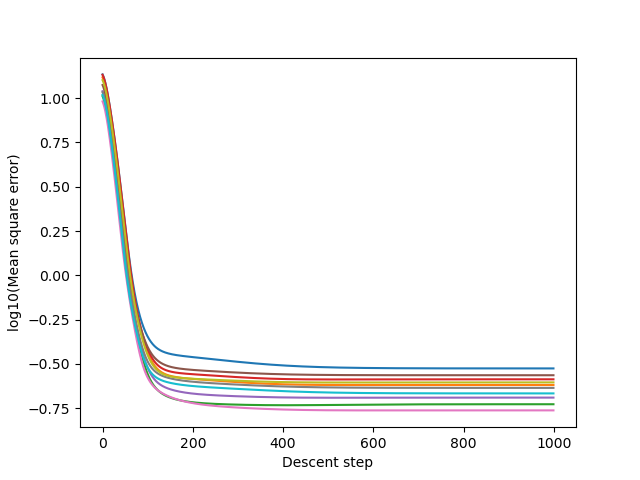

In [9]:
iq2 = ImageQuant2(img=imgs_c56s, roi=rois_c56s, cytbg=cytbg)
iq2.calibrate_membrane(**kwargs_dict)
iq2.plot_losses(log=True)

### Calibration 3 (L109R)


  0%|                                                                                                                                      | 0/1000 [00:00<?, ?it/s]


  0%|▏                                                                                                                             | 1/1000 [00:00<07:59,  2.08it/s]


  2%|██▏                                                                                                                          | 17/1000 [00:00<00:25, 38.24it/s]


  3%|████▏                                                                                                                        | 33/1000 [00:00<00:14, 67.65it/s]


  5%|██████▎                                                                                                                      | 50/1000 [00:00<00:10, 92.94it/s]


  7%|████████▎                                                                                                                   | 67/1000 [00:00<00:08, 112.04it/s]


  8%|██████████▍                                                                                                                 | 84/1000 [00:00<00:07, 126.59it/s]


 10%|████████████▍                                                                                                              | 101/1000 [00:01<00:06, 137.71it/s]


 12%|██████████████▌                                                                                                            | 118/1000 [00:01<00:06, 144.87it/s]


 14%|████████████████▌                                                                                                          | 135/1000 [00:01<00:05, 150.50it/s]


 15%|██████████████████▋                                                                                                        | 152/1000 [00:01<00:05, 148.86it/s]


 17%|████████████████████▋                                                                                                      | 168/1000 [00:01<00:05, 151.29it/s]


 18%|██████████████████████▋                                                                                                    | 184/1000 [00:01<00:05, 150.18it/s]


 20%|████████████████████████▋                                                                                                  | 201/1000 [00:01<00:05, 153.39it/s]


 22%|██████████████████████████▊                                                                                                | 218/1000 [00:01<00:05, 156.14it/s]


 24%|████████████████████████████▉                                                                                              | 235/1000 [00:01<00:04, 157.99it/s]


 25%|██████████████████████████████▉                                                                                            | 252/1000 [00:02<00:04, 160.81it/s]


 27%|█████████████████████████████████                                                                                          | 269/1000 [00:02<00:04, 161.14it/s]


 29%|███████████████████████████████████▏                                                                                       | 286/1000 [00:02<00:04, 162.04it/s]


 30%|█████████████████████████████████████▎                                                                                     | 303/1000 [00:02<00:04, 163.09it/s]


 32%|███████████████████████████████████████▎                                                                                   | 320/1000 [00:02<00:04, 151.88it/s]


 34%|█████████████████████████████████████████▎                                                                                 | 336/1000 [00:02<00:04, 141.95it/s]


 35%|███████████████████████████████████████████▏                                                                               | 351/1000 [00:02<00:04, 143.21it/s]


 37%|█████████████████████████████████████████████▎                                                                             | 368/1000 [00:02<00:04, 149.71it/s]


 38%|███████████████████████████████████████████████▏                                                                           | 384/1000 [00:02<00:04, 149.81it/s]


 40%|█████████████████████████████████████████████████▏                                                                         | 400/1000 [00:03<00:03, 152.50it/s]


 42%|███████████████████████████████████████████████████▎                                                                       | 417/1000 [00:03<00:03, 156.36it/s]


 43%|█████████████████████████████████████████████████████▎                                                                     | 433/1000 [00:03<00:03, 157.21it/s]


 45%|███████████████████████████████████████████████████████▎                                                                   | 450/1000 [00:03<00:03, 158.03it/s]


 47%|█████████████████████████████████████████████████████████▎                                                                 | 466/1000 [00:03<00:03, 152.86it/s]


 48%|███████████████████████████████████████████████████████████▎                                                               | 482/1000 [00:03<00:03, 154.39it/s]


 50%|█████████████████████████████████████████████████████████████▎                                                             | 498/1000 [00:03<00:03, 153.48it/s]


 52%|███████████████████████████████████████████████████████████████▎                                                           | 515/1000 [00:03<00:03, 155.91it/s]


 53%|█████████████████████████████████████████████████████████████████▎                                                         | 531/1000 [00:03<00:02, 156.53it/s]


 55%|███████████████████████████████████████████████████████████████████▎                                                       | 547/1000 [00:03<00:02, 157.05it/s]


 56%|█████████████████████████████████████████████████████████████████████▎                                                     | 564/1000 [00:04<00:02, 158.28it/s]


 58%|███████████████████████████████████████████████████████████████████████▎                                                   | 580/1000 [00:04<00:02, 154.64it/s]


 60%|█████████████████████████████████████████████████████████████████████████▍                                                 | 597/1000 [00:04<00:02, 158.30it/s]


 61%|███████████████████████████████████████████████████████████████████████████▍                                               | 613/1000 [00:04<00:02, 154.10it/s]


 63%|█████████████████████████████████████████████████████████████████████████████▍                                             | 630/1000 [00:04<00:02, 157.13it/s]


 65%|███████████████████████████████████████████████████████████████████████████████▍                                           | 646/1000 [00:04<00:02, 157.58it/s]


 66%|█████████████████████████████████████████████████████████████████████████████████▍                                         | 662/1000 [00:04<00:02, 147.52it/s]


 68%|███████████████████████████████████████████████████████████████████████████████████▍                                       | 678/1000 [00:04<00:02, 150.54it/s]


 69%|█████████████████████████████████████████████████████████████████████████████████████▎                                     | 694/1000 [00:04<00:01, 153.23it/s]


 71%|███████████████████████████████████████████████████████████████████████████████████████▍                                   | 711/1000 [00:05<00:01, 155.84it/s]


 73%|█████████████████████████████████████████████████████████████████████████████████████████▍                                 | 727/1000 [00:05<00:01, 156.74it/s]


 74%|███████████████████████████████████████████████████████████████████████████████████████████▌                               | 744/1000 [00:05<00:01, 158.59it/s]


 76%|█████████████████████████████████████████████████████████████████████████████████████████████▌                             | 761/1000 [00:05<00:01, 160.84it/s]


 78%|███████████████████████████████████████████████████████████████████████████████████████████████▋                           | 778/1000 [00:05<00:01, 159.55it/s]


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 795/1000 [00:05<00:01, 160.21it/s]


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 812/1000 [00:05<00:01, 161.08it/s]


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 829/1000 [00:05<00:01, 159.71it/s]


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 845/1000 [00:05<00:00, 159.49it/s]


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 862/1000 [00:05<00:00, 161.06it/s]


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 879/1000 [00:06<00:00, 162.83it/s]


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 896/1000 [00:06<00:00, 163.37it/s]


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 913/1000 [00:06<00:00, 163.72it/s]


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 930/1000 [00:06<00:00, 162.84it/s]


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 947/1000 [00:06<00:00, 162.89it/s]


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 964/1000 [00:06<00:00, 160.96it/s]


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 981/1000 [00:06<00:00, 162.35it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 998/1000 [00:06<00:00, 164.28it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 146.73it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

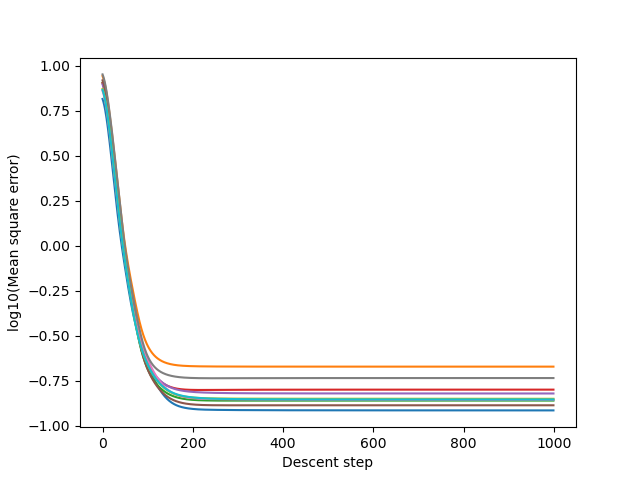

In [10]:
iq3 = ImageQuant2(img=imgs_l109r, roi=rois_l109r, cytbg=cytbg)
iq3.calibrate_membrane(**kwargs_dict)
iq3.plot_losses(log=True)

### Calibration 4 (L50R)


  0%|                                                                                                                                      | 0/1000 [00:00<?, ?it/s]


  0%|▏                                                                                                                             | 1/1000 [00:00<07:21,  2.26it/s]


  2%|██▎                                                                                                                          | 18/1000 [00:00<00:22, 43.01it/s]


  3%|████▎                                                                                                                        | 34/1000 [00:00<00:13, 73.08it/s]


  5%|██████▍                                                                                                                      | 51/1000 [00:00<00:09, 97.91it/s]


  7%|████████▎                                                                                                                   | 67/1000 [00:00<00:08, 114.53it/s]


  8%|██████████▎                                                                                                                 | 83/1000 [00:00<00:07, 125.75it/s]


 10%|████████████▏                                                                                                               | 98/1000 [00:01<00:06, 132.62it/s]


 11%|██████████████                                                                                                             | 114/1000 [00:01<00:06, 139.33it/s]


 13%|████████████████                                                                                                           | 131/1000 [00:01<00:05, 146.74it/s]


 15%|██████████████████▏                                                                                                        | 148/1000 [00:01<00:05, 150.84it/s]


 16%|████████████████████▎                                                                                                      | 165/1000 [00:01<00:05, 155.08it/s]


 18%|██████████████████████▍                                                                                                    | 182/1000 [00:01<00:05, 159.13it/s]


 20%|████████████████████████▍                                                                                                  | 199/1000 [00:01<00:04, 161.12it/s]


 22%|██████████████████████████▌                                                                                                | 216/1000 [00:01<00:04, 160.54it/s]


 23%|████████████████████████████▋                                                                                              | 233/1000 [00:01<00:06, 125.49it/s]


 25%|██████████████████████████████▋                                                                                            | 249/1000 [00:02<00:05, 133.58it/s]


 26%|████████████████████████████████▌                                                                                          | 265/1000 [00:02<00:05, 139.52it/s]


 28%|██████████████████████████████████▌                                                                                        | 281/1000 [00:02<00:05, 143.36it/s]


 30%|████████████████████████████████████▌                                                                                      | 297/1000 [00:02<00:04, 146.27it/s]


 31%|██████████████████████████████████████▌                                                                                    | 314/1000 [00:02<00:04, 149.62it/s]


 33%|████████████████████████████████████████▌                                                                                  | 330/1000 [00:02<00:04, 143.00it/s]


 35%|██████████████████████████████████████████▌                                                                                | 346/1000 [00:02<00:04, 146.72it/s]


 36%|████████████████████████████████████████████▍                                                                              | 361/1000 [00:02<00:04, 147.02it/s]


 38%|██████████████████████████████████████████████▎                                                                            | 377/1000 [00:02<00:04, 148.27it/s]


 39%|████████████████████████████████████████████████▏                                                                          | 392/1000 [00:03<00:04, 147.56it/s]


 41%|██████████████████████████████████████████████████▎                                                                        | 409/1000 [00:03<00:03, 149.88it/s]


 42%|████████████████████████████████████████████████████▎                                                                      | 425/1000 [00:03<00:03, 144.70it/s]


 44%|██████████████████████████████████████████████████████▏                                                                    | 441/1000 [00:03<00:03, 147.64it/s]


 46%|████████████████████████████████████████████████████████▏                                                                  | 457/1000 [00:03<00:03, 150.68it/s]


 47%|██████████████████████████████████████████████████████████▏                                                                | 473/1000 [00:03<00:03, 152.41it/s]


 49%|████████████████████████████████████████████████████████████▏                                                              | 489/1000 [00:03<00:03, 150.93it/s]


 51%|██████████████████████████████████████████████████████████████▏                                                            | 506/1000 [00:03<00:03, 154.92it/s]


 52%|████████████████████████████████████████████████████████████████▎                                                          | 523/1000 [00:03<00:03, 158.07it/s]


 54%|██████████████████████████████████████████████████████████████████▎                                                        | 539/1000 [00:03<00:02, 156.53it/s]


 56%|████████████████████████████████████████████████████████████████████▍                                                      | 556/1000 [00:04<00:02, 159.87it/s]


 57%|██████████████████████████████████████████████████████████████████████▍                                                    | 573/1000 [00:04<00:02, 159.44it/s]


 59%|████████████████████████████████████████████████████████████████████████▌                                                  | 590/1000 [00:04<00:02, 160.26it/s]


 61%|██████████████████████████████████████████████████████████████████████████▋                                                | 607/1000 [00:04<00:02, 160.50it/s]


 62%|████████████████████████████████████████████████████████████████████████████▊                                              | 624/1000 [00:04<00:02, 160.70it/s]


 64%|██████████████████████████████████████████████████████████████████████████████▊                                            | 641/1000 [00:04<00:02, 161.57it/s]


 66%|████████████████████████████████████████████████████████████████████████████████▉                                          | 658/1000 [00:04<00:02, 161.87it/s]


 68%|███████████████████████████████████████████████████████████████████████████████████                                        | 675/1000 [00:04<00:02, 161.56it/s]


 69%|█████████████████████████████████████████████████████████████████████████████████████                                      | 692/1000 [00:04<00:02, 147.00it/s]


 71%|███████████████████████████████████████████████████████████████████████████████████████                                    | 708/1000 [00:05<00:01, 149.16it/s]


 72%|█████████████████████████████████████████████████████████████████████████████████████████                                  | 724/1000 [00:05<00:01, 151.53it/s]


 74%|███████████████████████████████████████████████████████████████████████████████████████████                                | 740/1000 [00:05<00:01, 151.05it/s]


 76%|█████████████████████████████████████████████████████████████████████████████████████████████                              | 757/1000 [00:05<00:01, 154.09it/s]


 77%|███████████████████████████████████████████████████████████████████████████████████████████████                            | 773/1000 [00:05<00:01, 154.00it/s]


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 790/1000 [00:05<00:01, 156.66it/s]


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 807/1000 [00:05<00:01, 159.02it/s]


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 824/1000 [00:05<00:01, 160.85it/s]


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 841/1000 [00:05<00:00, 163.03it/s]


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 858/1000 [00:06<00:00, 161.06it/s]


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 875/1000 [00:06<00:00, 161.16it/s]


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 892/1000 [00:06<00:00, 160.35it/s]


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 909/1000 [00:06<00:00, 159.33it/s]


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 926/1000 [00:06<00:00, 160.80it/s]


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 943/1000 [00:06<00:00, 162.20it/s]


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 960/1000 [00:06<00:00, 161.65it/s]


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 977/1000 [00:06<00:00, 163.06it/s]


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 994/1000 [00:06<00:00, 160.88it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 145.04it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

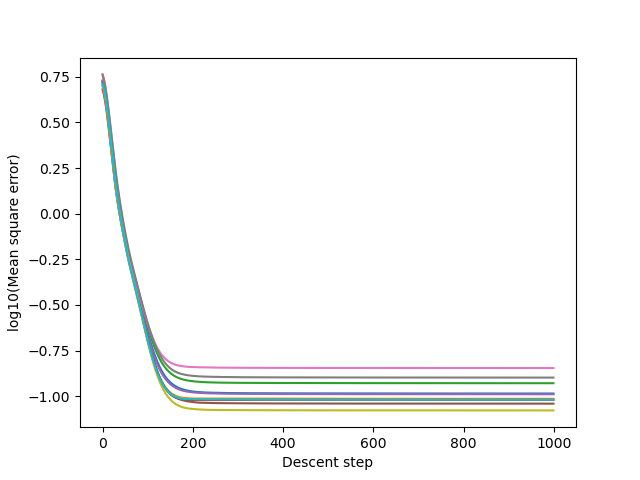

In [11]:
iq4 = ImageQuant2(img=imgs_l50r, roi=rois_l50r, cytbg=cytbg)
iq4.calibrate_membrane(**kwargs_dict)
iq4.plot_losses(log=True)

### Calibration 5 (WT single copy)


  0%|                                                                                                                                      | 0/1000 [00:00<?, ?it/s]


  0%|▏                                                                                                                             | 1/1000 [00:00<07:06,  2.34it/s]


  2%|██▏                                                                                                                          | 17/1000 [00:00<00:23, 41.70it/s]


  3%|████▏                                                                                                                        | 33/1000 [00:00<00:13, 72.50it/s]


  5%|██████▎                                                                                                                      | 50/1000 [00:00<00:09, 98.29it/s]


  7%|████████▎                                                                                                                   | 67/1000 [00:00<00:07, 117.58it/s]


  8%|██████████▍                                                                                                                 | 84/1000 [00:00<00:06, 132.34it/s]


 10%|████████████▍                                                                                                              | 101/1000 [00:01<00:06, 142.00it/s]


 12%|██████████████▌                                                                                                            | 118/1000 [00:01<00:05, 148.96it/s]


 14%|████████████████▌                                                                                                          | 135/1000 [00:01<00:05, 153.62it/s]


 15%|██████████████████▋                                                                                                        | 152/1000 [00:01<00:05, 157.73it/s]


 17%|████████████████████▊                                                                                                      | 169/1000 [00:01<00:05, 159.63it/s]


 19%|██████████████████████▉                                                                                                    | 186/1000 [00:01<00:05, 162.47it/s]


 20%|████████████████████████▉                                                                                                  | 203/1000 [00:01<00:04, 162.53it/s]


 22%|███████████████████████████                                                                                                | 220/1000 [00:01<00:04, 163.52it/s]


 24%|█████████████████████████████▏                                                                                             | 237/1000 [00:01<00:04, 163.77it/s]


 25%|███████████████████████████████▏                                                                                           | 254/1000 [00:01<00:04, 164.12it/s]


 27%|█████████████████████████████████▎                                                                                         | 271/1000 [00:02<00:04, 160.93it/s]


 29%|███████████████████████████████████▍                                                                                       | 288/1000 [00:02<00:04, 162.98it/s]


 30%|█████████████████████████████████████▌                                                                                     | 305/1000 [00:02<00:04, 164.31it/s]


 32%|███████████████████████████████████████▌                                                                                   | 322/1000 [00:02<00:04, 165.08it/s]


 34%|█████████████████████████████████████████▋                                                                                 | 339/1000 [00:02<00:03, 165.39it/s]


 36%|███████████████████████████████████████████▊                                                                               | 356/1000 [00:02<00:03, 165.01it/s]


 37%|█████████████████████████████████████████████▉                                                                             | 373/1000 [00:02<00:03, 164.54it/s]


 39%|███████████████████████████████████████████████▉                                                                           | 390/1000 [00:02<00:03, 165.26it/s]


 41%|██████████████████████████████████████████████████                                                                         | 407/1000 [00:02<00:03, 165.59it/s]


 42%|████████████████████████████████████████████████████▏                                                                      | 424/1000 [00:02<00:03, 165.27it/s]


 44%|██████████████████████████████████████████████████████▏                                                                    | 441/1000 [00:03<00:03, 164.84it/s]


 46%|████████████████████████████████████████████████████████▎                                                                  | 458/1000 [00:03<00:03, 164.96it/s]


 48%|██████████████████████████████████████████████████████████▍                                                                | 475/1000 [00:03<00:03, 166.12it/s]


 49%|████████████████████████████████████████████████████████████▌                                                              | 492/1000 [00:03<00:03, 166.51it/s]


 51%|██████████████████████████████████████████████████████████████▌                                                            | 509/1000 [00:03<00:02, 165.72it/s]


 53%|████████████████████████████████████████████████████████████████▋                                                          | 526/1000 [00:03<00:02, 165.89it/s]


 54%|██████████████████████████████████████████████████████████████████▊                                                        | 543/1000 [00:03<00:02, 164.06it/s]


 56%|████████████████████████████████████████████████████████████████████▉                                                      | 560/1000 [00:03<00:02, 165.30it/s]


 58%|██████████████████████████████████████████████████████████████████████▉                                                    | 577/1000 [00:03<00:02, 161.22it/s]


 59%|█████████████████████████████████████████████████████████████████████████                                                  | 594/1000 [00:04<00:02, 161.00it/s]


 61%|███████████████████████████████████████████████████████████████████████████▏                                               | 611/1000 [00:04<00:02, 160.06it/s]


 63%|█████████████████████████████████████████████████████████████████████████████▏                                             | 628/1000 [00:04<00:02, 162.40it/s]


 64%|███████████████████████████████████████████████████████████████████████████████▎                                           | 645/1000 [00:04<00:02, 164.15it/s]


 66%|█████████████████████████████████████████████████████████████████████████████████▍                                         | 662/1000 [00:04<00:02, 162.25it/s]


 68%|███████████████████████████████████████████████████████████████████████████████████▌                                       | 679/1000 [00:04<00:01, 163.65it/s]


 70%|█████████████████████████████████████████████████████████████████████████████████████▌                                     | 696/1000 [00:04<00:01, 162.19it/s]


 71%|███████████████████████████████████████████████████████████████████████████████████████▋                                   | 713/1000 [00:04<00:01, 163.36it/s]


 73%|█████████████████████████████████████████████████████████████████████████████████████████▊                                 | 730/1000 [00:04<00:01, 163.33it/s]


 75%|███████████████████████████████████████████████████████████████████████████████████████████▉                               | 747/1000 [00:04<00:01, 163.89it/s]


 76%|█████████████████████████████████████████████████████████████████████████████████████████████▉                             | 764/1000 [00:05<00:01, 163.14it/s]


 78%|████████████████████████████████████████████████████████████████████████████████████████████████                           | 781/1000 [00:05<00:01, 162.24it/s]


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 798/1000 [00:05<00:01, 163.46it/s]


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 815/1000 [00:05<00:01, 162.14it/s]


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 832/1000 [00:05<00:01, 163.33it/s]


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 849/1000 [00:05<00:00, 163.51it/s]


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 866/1000 [00:05<00:00, 163.44it/s]


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 883/1000 [00:05<00:00, 164.34it/s]


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 900/1000 [00:05<00:00, 161.31it/s]


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 917/1000 [00:06<00:00, 156.64it/s]


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 933/1000 [00:06<00:00, 157.47it/s]


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 950/1000 [00:06<00:00, 160.02it/s]


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 967/1000 [00:06<00:00, 162.19it/s]


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 984/1000 [00:06<00:00, 161.94it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 153.07it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

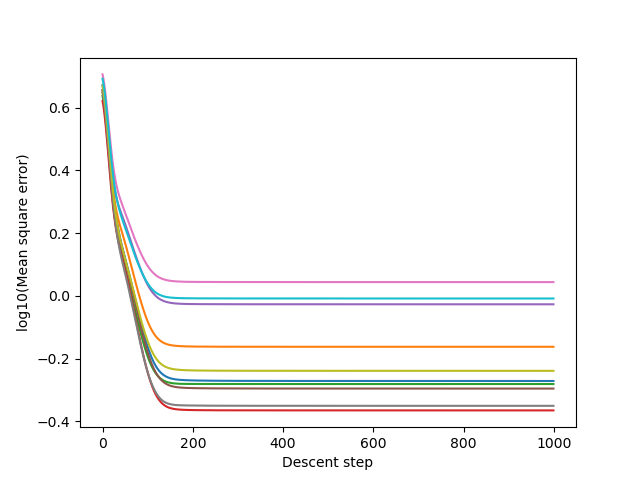

In [12]:
iq5 = ImageQuant2(img=imgs_het, roi=rois_het, cytbg=cytbg)
iq5.calibrate_membrane(**kwargs_dict)
iq5.plot_losses(log=True)

### Calibration 6 (Full dataset)


  0%|                                                                                                                                      | 0/1000 [00:00<?, ?it/s]


  0%|▏                                                                                                                             | 1/1000 [00:00<09:22,  1.78it/s]


  1%|█                                                                                                                             | 8/1000 [00:00<01:04, 15.33it/s]


  1%|█▊                                                                                                                           | 14/1000 [00:00<00:39, 24.75it/s]


  2%|██▌                                                                                                                          | 20/1000 [00:00<00:30, 32.28it/s]


  3%|███▎                                                                                                                         | 26/1000 [00:01<00:25, 38.11it/s]


  3%|████                                                                                                                         | 32/1000 [00:01<00:22, 42.59it/s]


  4%|████▊                                                                                                                        | 38/1000 [00:01<00:21, 45.81it/s]


  4%|█████▌                                                                                                                       | 44/1000 [00:01<00:19, 48.22it/s]


  5%|██████▎                                                                                                                      | 50/1000 [00:01<00:19, 49.72it/s]


  6%|███████▏                                                                                                                     | 57/1000 [00:01<00:17, 54.35it/s]


  6%|███████▉                                                                                                                     | 63/1000 [00:01<00:17, 54.52it/s]


  7%|████████▋                                                                                                                    | 69/1000 [00:01<00:17, 54.49it/s]


  8%|█████████▍                                                                                                                   | 75/1000 [00:01<00:17, 54.36it/s]


  8%|██████████▏                                                                                                                  | 81/1000 [00:01<00:17, 53.99it/s]


  9%|██████████▉                                                                                                                  | 87/1000 [00:02<00:16, 53.91it/s]


  9%|███████████▋                                                                                                                 | 93/1000 [00:02<00:16, 53.65it/s]


 10%|████████████▍                                                                                                                | 99/1000 [00:02<00:16, 53.94it/s]


 10%|█████████████                                                                                                               | 105/1000 [00:02<00:16, 54.06it/s]


 11%|█████████████▊                                                                                                              | 111/1000 [00:02<00:16, 54.03it/s]


 12%|██████████████▌                                                                                                             | 117/1000 [00:02<00:16, 54.11it/s]


 12%|███████████████▎                                                                                                            | 123/1000 [00:02<00:16, 54.07it/s]


 13%|███████████████▉                                                                                                            | 129/1000 [00:02<00:16, 54.06it/s]


 14%|████████████████▋                                                                                                           | 135/1000 [00:02<00:15, 54.12it/s]


 14%|█████████████████▍                                                                                                          | 141/1000 [00:03<00:15, 54.23it/s]


 15%|██████████████████▎                                                                                                         | 148/1000 [00:03<00:15, 56.37it/s]


 16%|███████████████████▏                                                                                                        | 155/1000 [00:03<00:14, 59.09it/s]


 16%|███████████████████▉                                                                                                        | 161/1000 [00:03<00:14, 57.73it/s]


 17%|████████████████████▋                                                                                                       | 167/1000 [00:03<00:14, 56.79it/s]


 17%|█████████████████████▍                                                                                                      | 173/1000 [00:03<00:14, 55.90it/s]


 18%|██████████████████████▏                                                                                                     | 179/1000 [00:03<00:14, 55.39it/s]


 18%|██████████████████████▉                                                                                                     | 185/1000 [00:03<00:14, 55.14it/s]


 19%|███████████████████████▋                                                                                                    | 191/1000 [00:03<00:14, 54.14it/s]


 20%|████████████████████████▌                                                                                                   | 198/1000 [00:04<00:14, 57.14it/s]


 20%|█████████████████████████▍                                                                                                  | 205/1000 [00:04<00:13, 59.06it/s]


 21%|██████████████████████████▏                                                                                                 | 211/1000 [00:04<00:13, 57.51it/s]


 22%|██████████████████████████▉                                                                                                 | 217/1000 [00:04<00:13, 56.21it/s]


 22%|███████████████████████████▋                                                                                                | 223/1000 [00:04<00:14, 55.40it/s]


 23%|████████████████████████████▍                                                                                               | 229/1000 [00:04<00:14, 54.99it/s]


 24%|█████████████████████████████▏                                                                                              | 235/1000 [00:04<00:13, 54.90it/s]


 24%|█████████████████████████████▉                                                                                              | 241/1000 [00:04<00:13, 54.65it/s]


 25%|██████████████████████████████▋                                                                                             | 247/1000 [00:04<00:13, 54.48it/s]


 25%|███████████████████████████████▎                                                                                            | 253/1000 [00:05<00:13, 54.53it/s]


 26%|████████████████████████████████                                                                                            | 259/1000 [00:05<00:13, 54.31it/s]


 26%|████████████████████████████████▊                                                                                           | 265/1000 [00:05<00:13, 54.27it/s]


 27%|█████████████████████████████████▌                                                                                          | 271/1000 [00:05<00:13, 54.09it/s]


 28%|██████████████████████████████████▎                                                                                         | 277/1000 [00:05<00:13, 54.01it/s]


 28%|███████████████████████████████████                                                                                         | 283/1000 [00:05<00:13, 53.91it/s]


 29%|███████████████████████████████████▊                                                                                        | 289/1000 [00:05<00:13, 53.95it/s]


 30%|████████████████████████████████████▌                                                                                       | 295/1000 [00:05<00:13, 54.10it/s]


 30%|█████████████████████████████████████▎                                                                                      | 301/1000 [00:05<00:12, 53.89it/s]


 31%|██████████████████████████████████████                                                                                      | 307/1000 [00:06<00:12, 53.99it/s]


 31%|██████████████████████████████████████▊                                                                                     | 313/1000 [00:06<00:12, 54.09it/s]


 32%|███████████████████████████████████████▌                                                                                    | 319/1000 [00:06<00:12, 53.98it/s]


 32%|████████████████████████████████████████▎                                                                                   | 325/1000 [00:06<00:12, 54.05it/s]


 33%|█████████████████████████████████████████                                                                                   | 331/1000 [00:06<00:12, 54.20it/s]


 34%|█████████████████████████████████████████▊                                                                                  | 337/1000 [00:06<00:12, 54.24it/s]


 34%|██████████████████████████████████████████▌                                                                                 | 343/1000 [00:06<00:12, 54.13it/s]


 35%|███████████████████████████████████████████▎                                                                                | 349/1000 [00:06<00:12, 54.07it/s]


 36%|████████████████████████████████████████████                                                                                | 355/1000 [00:06<00:11, 54.14it/s]


 36%|████████████████████████████████████████████▊                                                                               | 361/1000 [00:07<00:11, 54.25it/s]


 37%|█████████████████████████████████████████████▌                                                                              | 367/1000 [00:07<00:11, 54.17it/s]


 37%|██████████████████████████████████████████████▎                                                                             | 373/1000 [00:07<00:11, 54.06it/s]


 38%|██████████████████████████████████████████████▉                                                                             | 379/1000 [00:07<00:11, 53.95it/s]


 38%|███████████████████████████████████████████████▋                                                                            | 385/1000 [00:07<00:11, 53.88it/s]


 39%|████████████████████████████████████████████████▍                                                                           | 391/1000 [00:07<00:11, 53.91it/s]


 40%|█████████████████████████████████████████████████▏                                                                          | 397/1000 [00:07<00:11, 53.99it/s]


 40%|█████████████████████████████████████████████████▉                                                                          | 403/1000 [00:07<00:11, 54.14it/s]


 41%|██████████████████████████████████████████████████▋                                                                         | 409/1000 [00:07<00:10, 54.12it/s]


 42%|███████████████████████████████████████████████████▍                                                                        | 415/1000 [00:08<00:10, 54.10it/s]


 42%|████████████████████████████████████████████████████▏                                                                       | 421/1000 [00:08<00:10, 53.95it/s]


 43%|████████████████████████████████████████████████████▉                                                                       | 427/1000 [00:08<00:10, 53.94it/s]


 43%|█████████████████████████████████████████████████████▋                                                                      | 433/1000 [00:08<00:10, 54.09it/s]


 44%|██████████████████████████████████████████████████████▍                                                                     | 439/1000 [00:08<00:10, 53.82it/s]


 44%|███████████████████████████████████████████████████████▏                                                                    | 445/1000 [00:08<00:10, 53.49it/s]


 45%|███████████████████████████████████████████████████████▉                                                                    | 451/1000 [00:08<00:10, 52.05it/s]


 46%|████████████████████████████████████████████████████████▋                                                                   | 457/1000 [00:08<00:10, 52.78it/s]


 46%|█████████████████████████████████████████████████████████▍                                                                  | 463/1000 [00:09<00:10, 53.16it/s]


 47%|██████████████████████████████████████████████████████████▏                                                                 | 469/1000 [00:09<00:09, 54.00it/s]


 48%|███████████████████████████████████████████████████████████                                                                 | 476/1000 [00:09<00:09, 57.23it/s]


 48%|███████████████████████████████████████████████████████████▊                                                                | 482/1000 [00:09<00:09, 56.62it/s]


 49%|████████████████████████████████████████████████████████████▌                                                               | 488/1000 [00:09<00:09, 55.91it/s]


 49%|█████████████████████████████████████████████████████████████▎                                                              | 494/1000 [00:09<00:09, 55.47it/s]


 50%|██████████████████████████████████████████████████████████████                                                              | 500/1000 [00:09<00:09, 55.03it/s]


 51%|██████████████████████████████████████████████████████████████▋                                                             | 506/1000 [00:09<00:09, 54.66it/s]


 51%|███████████████████████████████████████████████████████████████▍                                                            | 512/1000 [00:09<00:08, 54.60it/s]


 52%|████████████████████████████████████████████████████████████████▏                                                           | 518/1000 [00:09<00:08, 54.30it/s]


 52%|████████████████████████████████████████████████████████████████▉                                                           | 524/1000 [00:10<00:08, 54.12it/s]


 53%|█████████████████████████████████████████████████████████████████▋                                                          | 530/1000 [00:10<00:08, 53.99it/s]


 54%|██████████████████████████████████████████████████████████████████▍                                                         | 536/1000 [00:10<00:08, 54.10it/s]


 54%|███████████████████████████████████████████████████████████████████▏                                                        | 542/1000 [00:10<00:08, 54.14it/s]


 55%|███████████████████████████████████████████████████████████████████▉                                                        | 548/1000 [00:10<00:08, 54.21it/s]


 55%|████████████████████████████████████████████████████████████████████▋                                                       | 554/1000 [00:10<00:08, 54.10it/s]


 56%|█████████████████████████████████████████████████████████████████████▍                                                      | 560/1000 [00:10<00:08, 54.05it/s]


 57%|██████████████████████████████████████████████████████████████████████▏                                                     | 566/1000 [00:10<00:08, 53.95it/s]


 57%|██████████████████████████████████████████████████████████████████████▉                                                     | 572/1000 [00:10<00:07, 53.80it/s]


 58%|███████████████████████████████████████████████████████████████████████▋                                                    | 578/1000 [00:11<00:07, 53.27it/s]


 58%|████████████████████████████████████████████████████████████████████████▍                                                   | 584/1000 [00:11<00:07, 52.61it/s]


 59%|█████████████████████████████████████████████████████████████████████████▏                                                  | 590/1000 [00:11<00:07, 53.12it/s]


 60%|█████████████████████████████████████████████████████████████████████████▉                                                  | 596/1000 [00:11<00:07, 53.34it/s]


 60%|██████████████████████████████████████████████████████████████████████████▋                                                 | 602/1000 [00:11<00:07, 52.70it/s]


 61%|███████████████████████████████████████████████████████████████████████████▍                                                | 608/1000 [00:11<00:07, 52.99it/s]


 61%|████████████████████████████████████████████████████████████████████████████▏                                               | 614/1000 [00:11<00:07, 53.22it/s]


 62%|████████████████████████████████████████████████████████████████████████████▉                                               | 620/1000 [00:11<00:07, 54.27it/s]


 63%|█████████████████████████████████████████████████████████████████████████████▌                                              | 626/1000 [00:11<00:06, 55.69it/s]


 63%|██████████████████████████████████████████████████████████████████████████████▎                                             | 632/1000 [00:12<00:06, 55.49it/s]


 64%|███████████████████████████████████████████████████████████████████████████████                                             | 638/1000 [00:12<00:06, 54.87it/s]


 64%|███████████████████████████████████████████████████████████████████████████████▊                                            | 644/1000 [00:12<00:06, 54.70it/s]


 65%|████████████████████████████████████████████████████████████████████████████████▌                                           | 650/1000 [00:12<00:06, 54.52it/s]


 66%|█████████████████████████████████████████████████████████████████████████████████▎                                          | 656/1000 [00:12<00:06, 54.36it/s]


 66%|██████████████████████████████████████████████████████████████████████████████████                                          | 662/1000 [00:12<00:06, 54.34it/s]


 67%|██████████████████████████████████████████████████████████████████████████████████▊                                         | 668/1000 [00:12<00:06, 54.19it/s]


 67%|███████████████████████████████████████████████████████████████████████████████████▌                                        | 674/1000 [00:12<00:06, 54.31it/s]


 68%|████████████████████████████████████████████████████████████████████████████████████▎                                       | 680/1000 [00:12<00:05, 53.81it/s]


 69%|█████████████████████████████████████████████████████████████████████████████████████                                       | 686/1000 [00:13<00:05, 53.91it/s]


 69%|█████████████████████████████████████████████████████████████████████████████████████▊                                      | 692/1000 [00:13<00:05, 53.93it/s]


 70%|██████████████████████████████████████████████████████████████████████████████████████▌                                     | 698/1000 [00:13<00:05, 54.07it/s]


 70%|███████████████████████████████████████████████████████████████████████████████████████▎                                    | 704/1000 [00:13<00:05, 54.10it/s]


 71%|████████████████████████████████████████████████████████████████████████████████████████                                    | 710/1000 [00:13<00:05, 54.34it/s]


 72%|████████████████████████████████████████████████████████████████████████████████████████▊                                   | 716/1000 [00:13<00:05, 53.49it/s]


 72%|█████████████████████████████████████████████████████████████████████████████████████████▌                                  | 722/1000 [00:13<00:05, 53.84it/s]


 73%|██████████████████████████████████████████████████████████████████████████████████████████▎                                 | 728/1000 [00:13<00:05, 54.00it/s]


 73%|███████████████████████████████████████████████████████████████████████████████████████████                                 | 734/1000 [00:13<00:04, 53.73it/s]


 74%|███████████████████████████████████████████████████████████████████████████████████████████▊                                | 740/1000 [00:14<00:04, 53.86it/s]


 75%|████████████████████████████████████████████████████████████████████████████████████████████▌                               | 746/1000 [00:14<00:04, 53.66it/s]


 75%|█████████████████████████████████████████████████████████████████████████████████████████████▏                              | 752/1000 [00:14<00:04, 53.89it/s]


 76%|█████████████████████████████████████████████████████████████████████████████████████████████▉                              | 758/1000 [00:14<00:04, 54.07it/s]


 76%|██████████████████████████████████████████████████████████████████████████████████████████████▋                             | 764/1000 [00:14<00:04, 54.08it/s]


 77%|███████████████████████████████████████████████████████████████████████████████████████████████▍                            | 770/1000 [00:14<00:04, 54.19it/s]


 78%|████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 776/1000 [00:14<00:04, 54.35it/s]


 78%|████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 782/1000 [00:14<00:04, 53.97it/s]


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 788/1000 [00:14<00:03, 54.02it/s]


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 794/1000 [00:15<00:03, 54.08it/s]


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 800/1000 [00:15<00:03, 54.07it/s]


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 806/1000 [00:15<00:03, 54.09it/s]


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 812/1000 [00:15<00:03, 53.65it/s]


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 818/1000 [00:15<00:03, 53.88it/s]


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 825/1000 [00:15<00:03, 56.70it/s]


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████                     | 831/1000 [00:15<00:03, 56.29it/s]


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 837/1000 [00:15<00:02, 55.82it/s]


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 843/1000 [00:15<00:02, 55.13it/s]


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 849/1000 [00:16<00:02, 54.86it/s]


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 855/1000 [00:16<00:02, 54.43it/s]


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 861/1000 [00:16<00:02, 54.15it/s]


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 867/1000 [00:16<00:02, 54.17it/s]


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 873/1000 [00:16<00:02, 54.17it/s]


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 879/1000 [00:16<00:02, 54.07it/s]


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 885/1000 [00:16<00:02, 53.92it/s]


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 891/1000 [00:16<00:02, 53.98it/s]


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 897/1000 [00:16<00:01, 54.14it/s]


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 903/1000 [00:17<00:01, 54.12it/s]


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 909/1000 [00:17<00:01, 53.88it/s]


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 915/1000 [00:17<00:01, 54.01it/s]


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 921/1000 [00:17<00:01, 54.11it/s]


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 927/1000 [00:17<00:01, 54.20it/s]


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 933/1000 [00:17<00:01, 54.18it/s]


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 939/1000 [00:17<00:01, 54.13it/s]


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 946/1000 [00:17<00:00, 56.49it/s]


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 953/1000 [00:17<00:00, 59.03it/s]


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 960/1000 [00:18<00:00, 61.44it/s]


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 967/1000 [00:18<00:00, 62.70it/s]


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 974/1000 [00:18<00:00, 63.70it/s]


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 981/1000 [00:18<00:00, 64.21it/s]


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 988/1000 [00:18<00:00, 63.02it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 995/1000 [00:18<00:00, 60.14it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.33it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

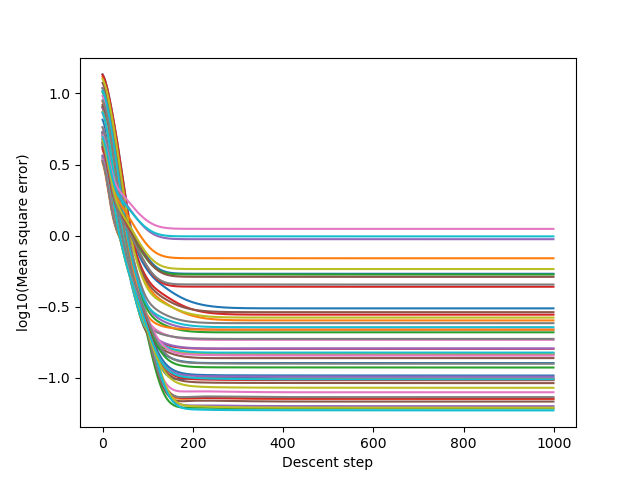

In [13]:
iq6 = ImageQuant2(img=imgs_wt + imgs_c56s + imgs_l109r + imgs_l50r + imgs_het, 
                  roi=rois_wt + rois_c56s + rois_l109r + rois_l50r + rois_het, cytbg=cytbg)
iq6.calibrate_membrane(**kwargs_dict)
iq6.plot_losses(log=True)

### View results

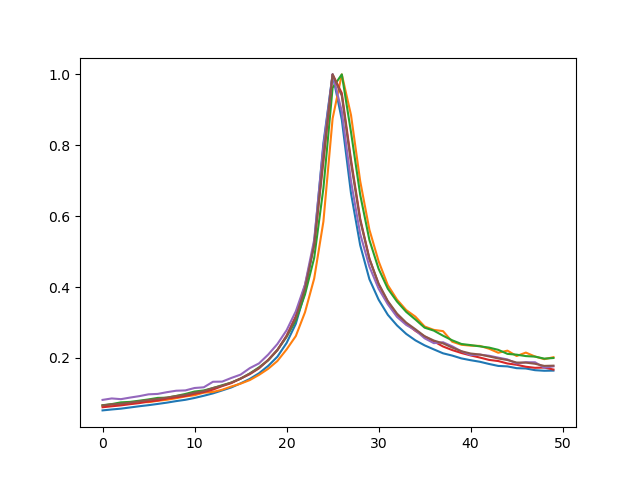

In [14]:
fig, ax = plt.subplots()
ax.plot(iq1.membg.T / np.max(iq1.membg))
ax.plot(iq2.membg.T / np.max(iq2.membg))
ax.plot(iq3.membg.T / np.max(iq3.membg))
ax.plot(iq4.membg.T / np.max(iq4.membg))
ax.plot(iq5.membg.T / np.max(iq5.membg))
ax.plot(iq6.membg.T / np.max(iq6.membg))

In [15]:
# Save
np.savetxt('../../data/calibration_mem1.txt', iq1.membg)
np.savetxt('../../data/calibration_mem2.txt', iq2.membg)
np.savetxt('../../data/calibration_mem3.txt', iq3.membg)
np.savetxt('../../data/calibration_mem4.txt', iq4.membg)
np.savetxt('../../data/calibration_mem5.txt', iq5.membg)
np.savetxt('../../data/calibration_mem6.txt', iq6.membg)